#**Discover The Most Popular Courses on Udemy**

Udemy is an online teaching and learning platform that offers both free and paid courses taught by instructors who are generally subject matter experts in their respective fields.

We're analyzing which courses and subjects should be promoted more in order to generate more profits each year. Apparently, there are more than ten categories available on Udemy. In this notebook, however, we would limit our analysis to 4 categories.

##**Part 1: Import Data**

First, we will import libraries and load our dataset. My dataset is stored in my Google Drive. However, the same dataset is available in [Udemy Courses Dataset in Kaggle](https://www.kaggle.com/datasets/andrewmvd/udemy-courses)

In [ ]:
# Import Python Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATASET EXAMPLE/udemy_courses.csv')

In [ ]:
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB



Our dataset contains 3.678 rows and 12 columns.
Here are the features explanation :

1. course_id : id field for courses
2. course_title : title field for courses
3. url : url field for course page
4. is_paid : boolean field - True for Paid and False for Free
5. price : price field for course fee
6. num_subscribers : demand field for each courses
7. num_reviews : review number for each courses
8. num_lectures : lecture per course
9. level : course level by trainee experience
10. content_duration : course duration in hours
11. published_timestamp : timestamp field for publication
12. subject : course type field

##**Part 2: Data Pre-processing**

We need to convert some columns and separate the data needed for further analysis. Most important things, we need to check missing values and duplicated rows.

In [ ]:
#Convert Data

#'publish_timestamp' column from object to date time
df['published_timestamp']=pd.to_datetime(df['published_timestamp'])

#making new column 'year' from 'publish_timestamp'
df['year']=df['published_timestamp'].dt.year

#'course id' column from int to str
df['course_id']=(df['course_id']).astype(str)

In [ ]:
# Check Missing Values

df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
year                   0
dtype: int64

In [ ]:
# Check Duplicate Data

df.duplicated().sum()

6

In [ ]:
df[df.duplicated(keep=False)].sort_values('course_id')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
778,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance,2016
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance,2016
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance,2017
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance,2017
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance,2017
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance,2017
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design,2014
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design,2014
2478,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development,2013
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development,2013


In [ ]:
# Drop Duplicated Rows
df_update = df.drop_duplicates()

In [ ]:
# Sanity Check
df_update.duplicated().sum()

0

It turns out that the dataset contains 6 duplicated rows, which we must remove. Fortunately, there are no missing values.

##**Part 3: Data Understanding**

In this part, we are taking a look at the data. First, we divide numerical and categorical data. We won't include some columns, such as course id, course title and url. In addition, we also add a new columns, which is "year".

In [ ]:
categoricals = ['is_paid', 'level', 'subject']

numericals = ['price', 'num_subscribers', 'num_reviews', 'num_lectures','content_duration','year']

In [ ]:
#Statistical Summary
df_update[numericals].describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration,year
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,66.102941,3190.586874,156.371460,40.140251,4.097603,2015.431100
std,61.035920,9488.105448,936.178649,50.417102,6.057830,1.184731
min,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,20.000000,111.750000,4.000000,15.000000,1.000000,2015.000000
50%,45.000000,912.000000,18.000000,25.000000,2.000000,2016.000000
75%,95.000000,2548.750000,67.000000,46.000000,4.500000,2016.000000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000,2017.000000


From this statistical summary, we can see that overall the minimum and maximum values make sense for each column, except content_duration and num_lectures with minimum values = 0.

Meanwhile, the main inference that we can get here is, for most of the columns, the mean value is larger than median value (50th percentile: 50%). This is an indication that those features have a right skewed data. This information will be visible for us when we create distribution plot for individual features in Data Visualization part.


In [ ]:
df_update[(df_update['content_duration']==0.00)&(df_update['num_lectures']==0.00)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
892,627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investo...,True,20,0,0,0,All Levels,0.0,2015-12-17 05:38:38+00:00,Business Finance,2015


For curiousity purpose, we did find the 0 hour and lecture course as above. However, since it is only 1 row, most likely it will not affect our analysis.

In [ ]:
# Describe method on categorical data
df_update[categoricals].describe()

,is_paid,level,subject
count,3672,3672,3672
unique,2,4,4
top,True,All Levels,Web Development
freq,3362,1925,1199


In [ ]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of is_paid column
True     3368
False     310
Name: is_paid, dtype: int64 

Value counts of level column
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64 

Value counts of subject column
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64 



It is shown above the precise value counts for each categorical columns. There is an imbalance in the dataset (number of True(paid) courses is more than number of False(Free) courses). We will use it further to visualize and answer some problem questions.

##**Part 4: Analysis and Visualizations**

**Univariate Analysis**

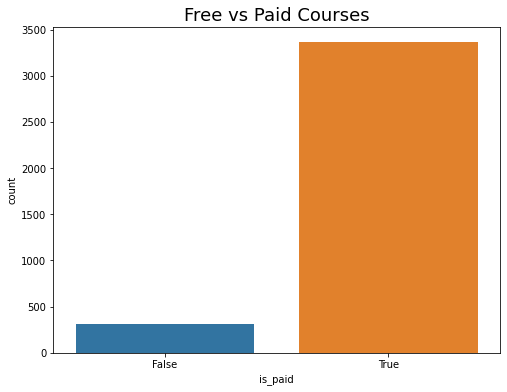

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df_update, x='is_paid')

plt.title('Free vs Paid Courses', fontsize=18);

As we can clearly see, the number of data points with label “True” is higher than label “False”. This means that we have more **paid** courses compared to **free** courses in the dataset, which is actually good for the company's revenue.

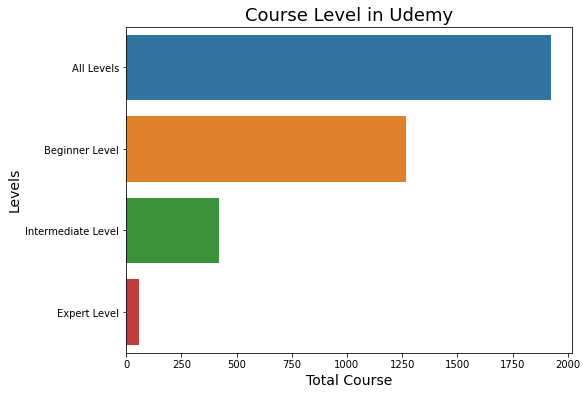

In [ ]:
plt.figure(figsize=(8,6))
level_count = df_update.groupby(['level'],as_index=False).size()
level_count = level_count.sort_values(['size'],ascending=False)
sns.barplot(y=level_count['level'], x=level_count['size'])
plt.title('Course Level in Udemy', fontsize=18)
plt.xlabel('Total Course', fontsize=14)
plt.ylabel('Levels', fontsize=14);

We can clearly see, we have the highest number of **All Levels** courses, followed by **Beginner and Intermediate level** respectively. Meanwhile, we only have a few courses for **Expert** level.

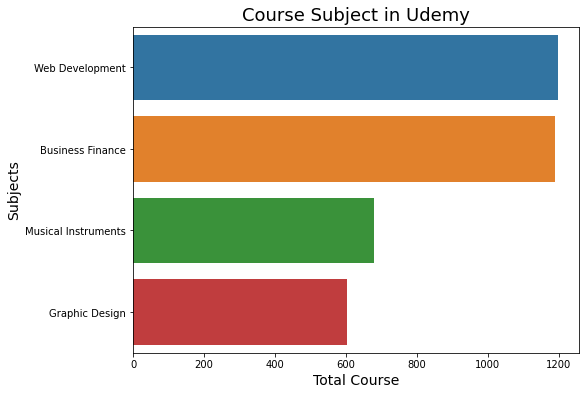

In [ ]:
plt.figure(figsize=(8,6))
subject_count = df_update.groupby(['subject'],as_index=False).size()
subject_count = subject_count.sort_values(['size'],ascending=False)
sns.barplot(y=subject_count['subject'], x=subject_count['size'])
plt.title('Course Subject in Udemy', fontsize=18)
plt.xlabel('Total Course', fontsize=14)
plt.ylabel('Subjects', fontsize=14);

As we can see from the bar chart above, there is only a slight difference between **Web Development and Business Finance**. Those two subjects dominate our course topics, followed by Musical Instruments and Graphic Design.

**Distribution Plot for Numerical Columns**

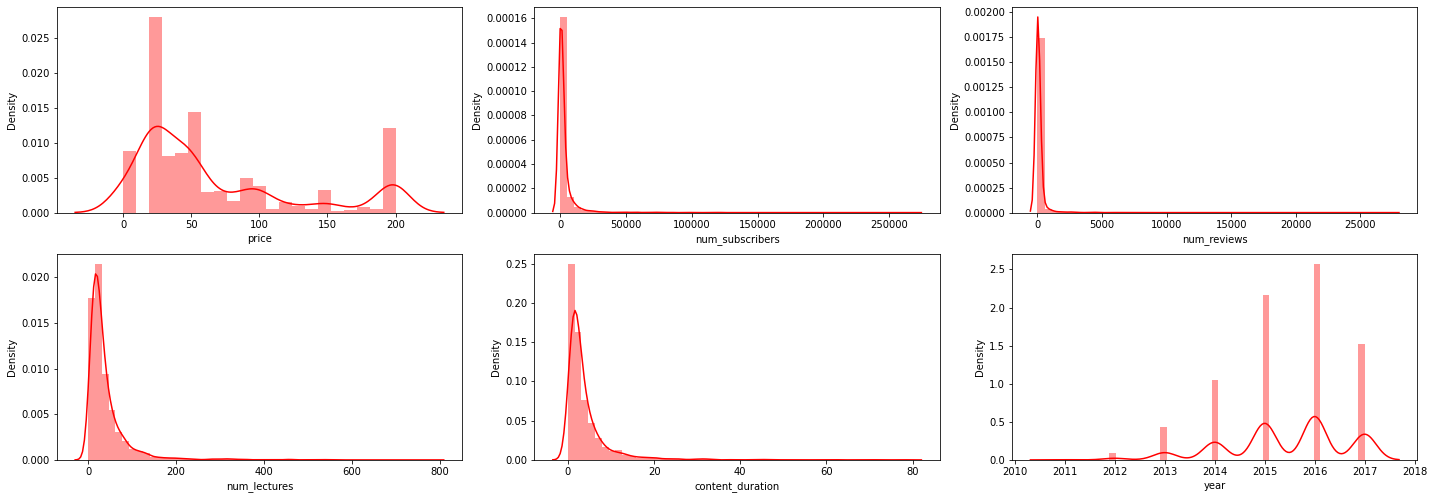

In [ ]:
plt.figure(figsize=(20,10))

features = numericals
for i in range(0, len(features)):
    plt.subplot(3, len(features)//3 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_update[features[i]], color='red')
    plt.xlabel(features[i])
    plt.tight_layout(pad=1);


We can see that most of the columns have right skewness in this dataset, except for 'year' column.

**Udemy** 
- provides courses with a variety of prices, from 0(free) to 200 USD. (We assume the currency is USD).
- seems to have a lot of new courses since there are many courses with 0 subscribers. However, Udemy also has courses with more than 250K subscribers.
- seems to also have a lot of courses with 0 reviews. Nevertheless, we also have a lot of courses with more than 25K reviews.
- provides a lot of courses with many lectures, anywhere from 1–800 in total.
- provides courses with a variable duration of 2–80 hours in total.
- seems to have an increase in courses with a peak in 2016 and a sudden decrease in 2017.




**Checking for Outliers**

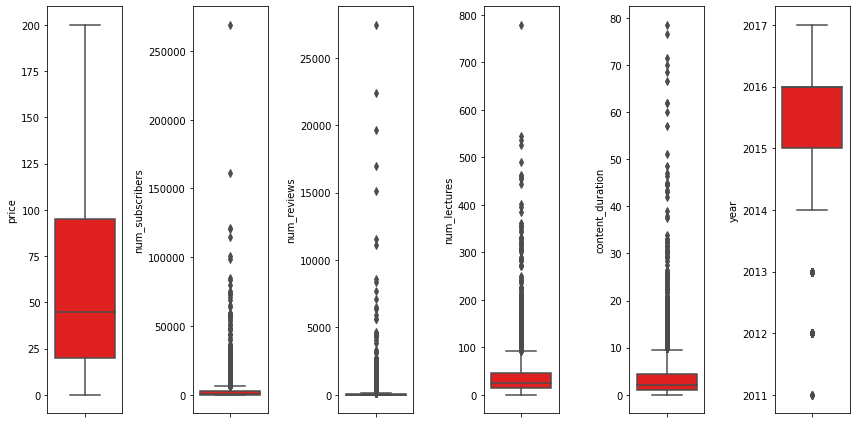

In [ ]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_update[features[i]], color='red')
    plt.tight_layout()

We can see many outliers in our dataset from the boxplot above. However, we decided to leave it behind since they're all real numbers that make sense for our numerical data.

**Multivariate Analysis**

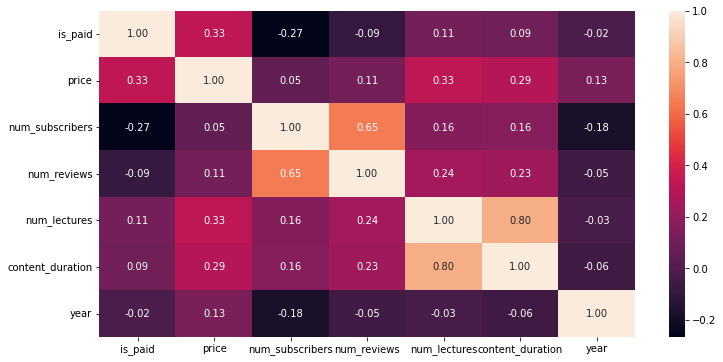

In [ ]:
plt.figure(figsize=(12,6))
correlation = df_update.corr()
sns.heatmap(correlation, annot=True, fmt='.2f');

'num_lectures' and 'content_duration' are highly correlated to each other. It indicates that the more number of lectures are, the more total duration of the courses.

##**Part 5: Deep Dive Explorations**

**1. What are The Top 10 Courses with The Most Subscribers?**

In [ ]:
# Top 10 Courses with the most subscribers
top10_course = (df_update
            .groupby('course_title') 
            .agg(num_subs=('num_subscribers', 'sum'))
            .reset_index()
            .sort_values('num_subs',ascending=False)
            .head(10)
            )
top10_course

,course_title,num_subs
2108,Learn HTML5 Programming From Scratch,268923
757,Coding for Entrepreneurs Basic,161029
3296,The Web Developer Bootcamp,121584
592,Build Your First Website in 1 Week with HTML5 ...,120291
3227,The Complete Web Developer Course 2.0,114512
1337,Free Beginner Electric Guitar Lessons,101154
3463,Web Design for Web Developers: Build Beautiful...,98867
2143,Learn Javascript & JQuery From Scratch,84897
2800,Practical PHP: Master the Basics and Code Dyna...,83737
1965,JavaScript: Understanding the Weird Parts,79612


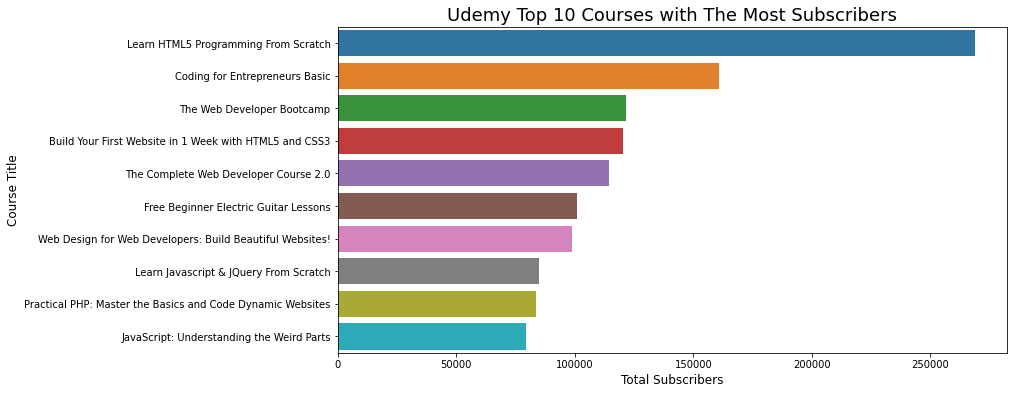

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_course, x='num_subs', y='course_title')
plt.title('Udemy Top 10 Courses with The Most Subscribers', fontsize=18)
plt.xlabel('Total Subscribers', fontsize=12)
plt.ylabel('Course Title', fontsize=12);


We already knew that the Web Development topic on Udemy has the most total courses. The chart now shows that 9 of the top ten most-subscribed courses are in the Web Development category. The other course is from the subject of Musical Instruments.

**2. What are The Courses with 0 Subscribers and Reviews?**

In [ ]:
nullcourses= df_update[(df_update['num_subscribers']==0.00)&(df_update['num_reviews']==0.00)]
nullcourses

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance,2016
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance,2017
455,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.500000,2017-07-06 21:46:30+00:00,Business Finance,2017
456,1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2.000000,2017-07-03 21:40:32+00:00,Business Finance,2017
457,1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50,0,0,9,Intermediate Level,2.000000,2017-06-29 22:01:56+00:00,Business Finance,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2402,1214670,Tune that Sour Note on Your Piano,https://www.udemy.com/how-to-tune-your-own-piano/,True,20,0,0,6,All Levels,0.550000,2017-06-20 21:46:40+00:00,Musical Instruments,2017
2403,1272282,Learn Vikings Soundtracks on the Piano by Ear,https://www.udemy.com/learn-vikings-soundtrack...,True,20,0,0,8,All Levels,0.583333,2017-06-29 15:10:58+00:00,Musical Instruments,2017
2404,1224186,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,True,35,0,0,13,Beginner Level,0.516667,2017-05-30 00:19:02+00:00,Musical Instruments,2017
2405,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,https://www.udemy.com/abrsm-grade-iii-piano-cl...,True,20,0,0,5,Beginner Level,0.516667,2017-07-06 16:12:34+00:00,Musical Instruments,2017


We can see by filtering rows that there are courses with no subscribers or reviews. The majority of them are in the Business Finance and Musical Instruments categories.

**3. What are The Top 10 Courses with The Most Reviews?**

In [ ]:
# Top 10 Courses with the most reviews
top10_reviews = (df_update
            .groupby('course_title') 
            .agg(num_rev=('num_reviews', 'sum'))
            .reset_index()
            .sort_values('num_rev',ascending=False)
            .head(10)
            )
top10_reviews

,course_title,num_rev
3296,The Web Developer Bootcamp,27445
3227,The Complete Web Developer Course 2.0,22412
268,Angular 4 (formerly Angular 2) - The Complete ...,19649
1965,JavaScript: Understanding the Weird Parts,16976
2535,Modern React with Redux,15117
2254,Learn and Understand AngularJS,11580
2255,Learn and Understand NodeJS,11123
2108,Learn HTML5 Programming From Scratch,8629
265,Angular 2 with TypeScript for Beginners: The P...,8341
2744,Pianoforall - Incredible New Way To Learn Pian...,7676


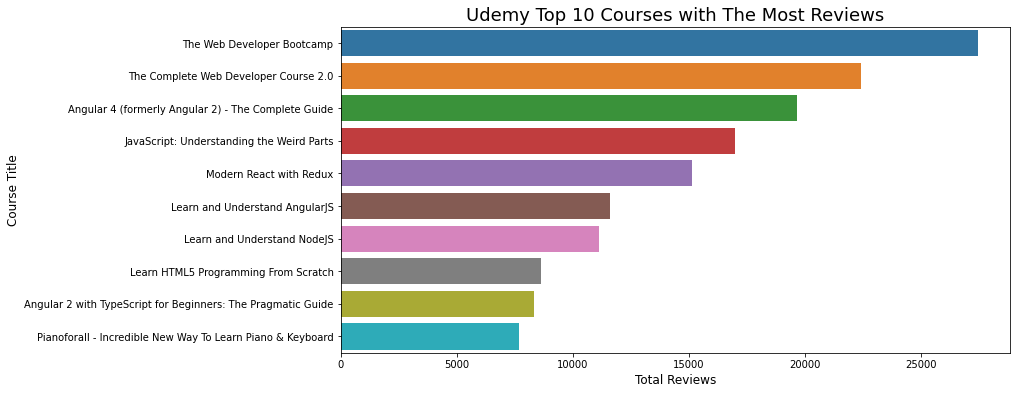

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_reviews, x='num_rev', y='course_title')
plt.title('Udemy Top 10 Courses with The Most Reviews', fontsize=18)
plt.xlabel('Total Reviews', fontsize=12)
plt.ylabel('Course Title', fontsize=12);


It turns out that 9 of the top 10 most reviewed courses are also in the Web Development category, with a Musical Instruments course ranking 10th. It proves how popular Web Development courses are in today's society.

**4. Course Subject Throughout The Year**

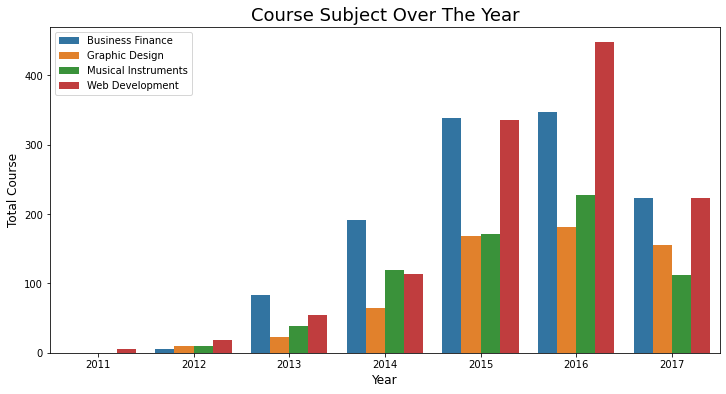

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_update,
            hue='subject',
            x='year')
plt.title('Course Subject Over The Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Course', fontsize=12)
plt.legend(loc='upper left');

Starting with a course in the web development category, the course at **Udemy** has developed rapidly. Web Development and Business Finance remain the most popular categories until 2017. However, there is a significant drop in total courses from 2016 to 2017.

**5. Why is there a sudden decrease in course topics in 2017 ?**


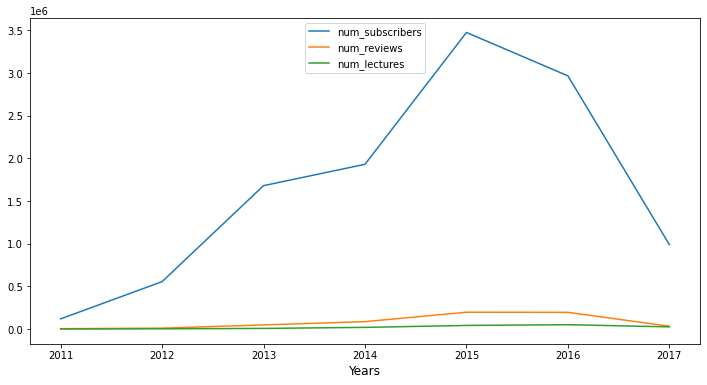

In [ ]:
df1 = df_update.groupby('year')[['num_subscribers','num_reviews','num_lectures']].sum().reset_index()
df1.plot(x='year', y=['num_subscribers','num_reviews','num_lectures'],
        kind="line", figsize=(12, 6))
plt.xlabel('Years', fontsize=12)
plt.legend(loc='upper center');

The number of subscribers in course topics tended to increase from 2011 to 2015, then decrease in 2016 and 2017.
When combined with the previous chart on course subject analysis, we can see that the number of course subjects increased in 2016, but the number of subscribers actually reduced, which could explain why the amount of courses decreased in 2017.

**6. Total Revenue Throughout The Year**

In [ ]:
df_update['total_revenue']=df_update['price']*df_update['num_subscribers']
df_update.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,total_revenue
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017,429400
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017,209400
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,2016,97830


In [ ]:
yearly_data = (df_update
                .groupby('year')
                .agg(num_cust=('num_subscribers','sum'),
                     total_revenue=('total_revenue', 'sum'))
                .reset_index())

yearly_data


,year,num_cust,total_revenue
0,2011,119028,11643420
1,2012,555339,11773470
2,2013,1680153,69405820
3,2014,1930406,106939045
4,2015,3475324,314510395
5,2016,2966644,276633190
6,2017,988941,90769600


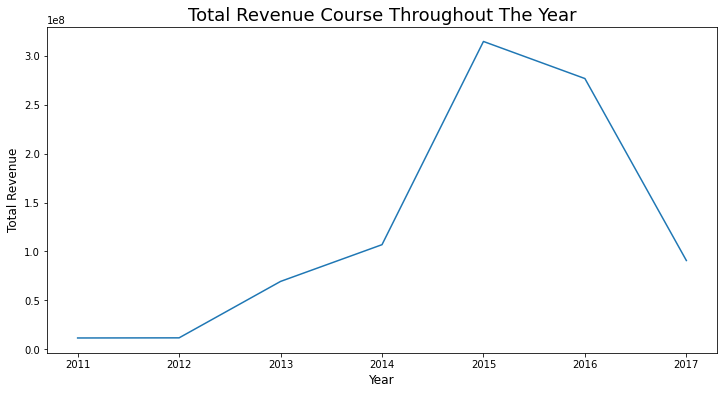

In [ ]:
# omzet progression
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_data,
             x='year',
             y='total_revenue')
plt.title('Total Revenue Course Throughout The Year', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12);

The total revenue for 2017 has decreased. This is a domino effect of the 2016 surge in the number of courses but a reduction in new subscribers. As a result, there were considerably fewer subscribers in 2017 and total revenue dropped sharply.

**7.Course Subjects with The Most Revenue**

In [ ]:
top_revenue = (df_update
            .groupby('subject') 
            .agg(num_revenue=('total_revenue', 'sum'))
            .reset_index()
            .sort_values('num_revenue',ascending=False)
            .head(10)
            )
top_revenue

,subject,num_revenue
3,Web Development,627597400
0,Business Finance,123735315
1,Graphic Design,76983170
2,Musical Instruments,53359055


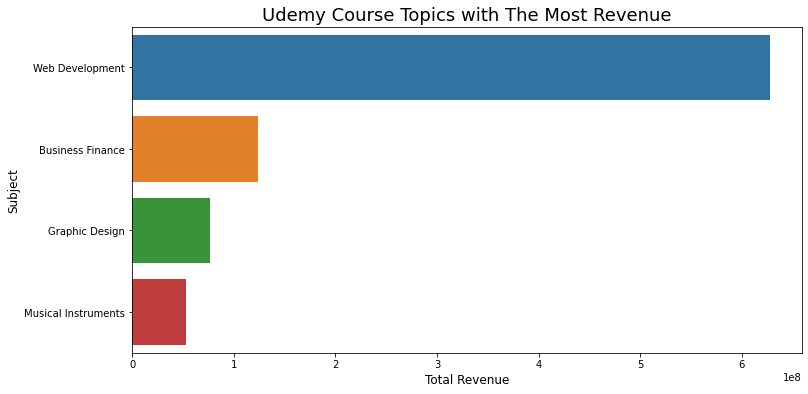

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_revenue, x='num_revenue', y='subject')
plt.title('Udemy Course Topics with The Most Revenue', fontsize=18)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Subject', fontsize=12);


The majority of Udemy's revenue came from courses on the Web Development category, as expected. The gap is also significant.

##**Part 6: Conclusion and Recommendation**

**Key Findings and Insight**

- Web Development has become our most popular course category, with the most subscribers, reviews, and revenue overall.
- Despite the fact that we also get second highest revenue from the Business Finance category, there are a lot of courses with no reviews or subscribers.
- We discovered a significant decrease in total courses in 2017. This is due to the total number of courses offered in 2016, while our subscription base is decreasing. This also resulted in a significant drop in our profit in 2017.

**Recommendation**
- Offer mixed bundling for each category or cross-category to reduce total courses with 0 subscribers.
- Pay special attention to courses that have no reviews or subscribers. Since we assume the courses were recently published, we should dedicate special space on our front page to promote new courses in order to attract more attention.
- To regularly examine the course's quality on our platform in the future for the courses that failed to perform. 
- Provide a special discount to new subscribers while rewarding loyal subscribers with a coupon for a basic course in a certain topic when they successfully invite others using an affiliate link.